# Project: Comparison

In [1]:
import os
print(os.getcwd())

/home/joram/Documents/Git_final/Compare


#### Let us import useful packages 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import geopandas as gpd 
import descartes

#### Let us load and read the datasets

In [3]:
data_ebola = pd.read_csv("pandemic_ebola_dataset.csv")
data_covid = pd.read_csv("pandemic_coronavirus_dataset.csv")
data_sars = pd.read_csv("pandemic_sars_dataset.csv")

#### Let us see each dataset 

In [4]:
# For Ebola dataset 
data_ebola.head(5)

,Country/Region,Date,Confirmed,Deaths,Lat,Long
0,Guinea,2014-08-29,482.0,287.0,9.945600,-9.696600
1,Nigeria,2014-08-29,15.0,6.0,9.082000,8.675300
2,Sierra Leone,2014-08-29,935.0,380.0,8.460555,-11.779889
3,Liberia,2014-08-29,322.0,225.0,6.428100,-9.429500
4,Sierra Leone,2014-09-05,1146.0,443.0,8.460555,-11.779889


In [5]:
# For Covid dataset
data_covid.head(5)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Recovered,Deaths
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0.0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0.0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0.0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0.0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0.0,0


In [6]:
# For saras dataset 
data_sars.head(5)

,Date,Country/Region,Confirmed,Deaths,Recovered,Lat,Long
0,2003-03-17,Germany,1,0,0,51.0000,9.0000
1,2003-03-17,Canada,8,2,0,64.2823,-135.0000
2,2003-03-17,Singapore,20,0,0,1.2833,103.8333
3,2003-03-17,Hong Kong,95,1,0,NaN,NaN
4,2003-03-17,Switzerland,2,0,0,46.8182,8.2275


#### Let us see the shapes of dataset

In [7]:
print('The shape of the ebola dataset is ',data_ebola.shape)
print('====================================================')
print('The shape of covid dataset is ',data_covid.shape)
print('===================================================')
print('The shape of sars dataset is ',data_sars.shape)

The shape of the ebola dataset is  (2485, 6)
The shape of covid dataset is  (18576, 8)
The shape of sars dataset is  (2538, 7)


#### Let us check if there are some missing data

In [8]:
# In case of ebola outbreak
data_ebola.isnull().values.any()

True

In [9]:
data_ebola.isnull()

,Country/Region,Date,Confirmed,Deaths,Lat,Long
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
2480,False,False,False,True,False,False
2481,False,False,False,True,False,False
2482,False,False,False,False,False,False
2483,False,False,False,False,False,False


In [10]:
# In case of covid outbreak
data_covid.isnull().values.any()

True

In [11]:
# In case of sars outbreak
data_sars.isnull().values.any()

True

#### Let us see the missing values in each feature

In [12]:
# For ebola
data_ebola.isnull().sum()

Country/Region      0
Date                0
Confirmed           1
Deaths            837
Lat                 0
Long                0
dtype: int64

In [13]:
# In case of covid outbreak
data_covid.isnull().sum()

Province/State    12816
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Recovered          1008
Deaths                0
dtype: int64

In [14]:
# In case of sars outbreak
data_sars.isnull().sum()

Date               0
Country/Region     0
Confirmed          0
Deaths             0
Recovered          0
Lat               96
Long              96
dtype: int64

#### Let us see the distribtion  for features in each case

In [15]:
# For ebola
data_ebola.describe().T

,count,mean,std,min,25%,50%,75%,max
Confirmed,2484.0,1436.616345,2574.200797,1.0000,1.000000,7.0000,3118.000000,8704.0
Deaths,1648.0,781.662015,1258.113098,0.0000,0.000000,2.0000,1760.750000,3858.0
Lat,2485.0,18.931932,12.825013,6.4281,8.460555,14.4974,37.090200,43.0
Long,2485.0,-20.133179,32.162145,-95.7129,-14.452400,-9.4295,-3.996166,12.0


In [16]:
# For covid
data_covid.describe().T

,count,mean,std,min,25%,50%,75%,max
Lat,18576.0,21.650595,24.446770,-41.4545,7.5400,23.659750,41.2044,71.7069
Long,18576.0,22.847768,70.939330,-135.0000,-19.0208,20.921188,84.2500,178.0650
Confirmed,18576.0,675.610304,6202.699140,0.0000,0.0000,0.000000,42.0000,243453.0000
Recovered,17568.0,198.723076,2487.891933,0.0000,0.0000,0.000000,2.0000,63471.0000
Deaths,18576.0,28.735411,363.769841,0.0000,0.0000,0.000000,0.0000,13915.0000


In [17]:
# For sars
data_sars.describe().T

,count,mean,std,min,25%,50%,75%,max
Confirmed,2538.0,219.211978,825.024564,0.0000,1.0000,3.0000,14.7500,5329.0000
Deaths,2538.0,17.812845,61.425627,0.0000,0.0000,0.0000,2.0000,348.0000
Recovered,2538.0,134.678487,581.595350,0.0000,1.0000,2.0000,9.0000,4941.0000
Lat,2442.0,27.630908,25.489475,-40.9006,15.0000,29.5000,46.8182,64.2823
Long,2442.0,40.280175,76.841468,-135.0000,2.2137,24.9668,112.5000,174.8860


## Let us see the cases of six people detected each day

#### For ebola

In [18]:
data_ebola.columns

Index(['Country/Region', 'Date', 'Confirmed', 'Deaths', 'Lat', 'Long'], dtype='object')

In [19]:
case_ebol_per_day = data_ebola.groupby('Date')['Confirmed', 'Deaths'].max()

<ipython-input-19-28282c7bd275>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  case_ebol_per_day = data_ebola.groupby('Date')['Confirmed', 'Deaths'].max()


In [20]:
case_ebol_per_day

,Confirmed,Deaths
Date,,
2014-08-29,935.0,380.0
2014-09-05,1146.0,443.0
2014-09-08,1234.0,508.0
2014-09-12,1287.0,498.0
2014-09-16,1464.0,563.0
...,...,...
2015-12-17,8704.0,3589.0
2015-12-22,8704.0,3589.0
2015-12-23,8704.0,3589.0


#### For sars

In [21]:
data_sars.columns

Index(['Date', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Lat',
       'Long'],
      dtype='object')

In [22]:
case_sars_per_day = data_sars.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].max()

<ipython-input-22-fe03d1def054>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  case_sars_per_day = data_sars.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].max()


In [23]:
case_sars_per_day

,Confirmed,Deaths,Recovered
Date,,,
2003-03-17,95,2,0
2003-03-18,123,2,0
2003-03-19,150,5,0
2003-03-20,173,6,0
2003-03-21,203,6,0
...,...,...,...
2003-07-07,5327,348,4934
2003-07-08,5327,348,4934
2003-07-09,5327,348,4939


#### For covid

In [24]:
data_covid.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Recovered', 'Deaths'],
      dtype='object')

In [25]:
case_covid_per_day =  data_covid.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].max()

<ipython-input-25-f7aa101ba179>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  case_covid_per_day =  data_covid.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].max()


In [26]:
case_covid_per_day

,Confirmed,Deaths,Recovered
Date,,,
1/22/20,444,17,28.0
1/23/20,444,17,28.0
1/24/20,549,24,31.0
1/25/20,761,40,42.0
1/26/20,1058,52,45.0
...,...,...,...
3/7/20,67666,2959,47743.0
3/8/20,67707,2986,49134.0
3/9/20,67743,3008,50318.0


### Let us visualize the comparison

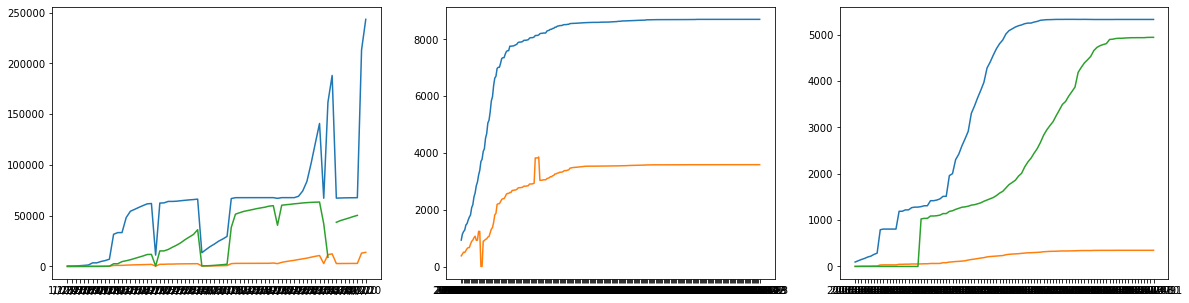

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
axes[0].plot(case_covid_per_day)
axes[1].plot(case_ebol_per_day)
axes[2].plot(case_sars_per_day)
plt.show()

### Let us see the spread during the  200 days of the outbreak

In [207]:
import datetime

In [208]:
data_ebola_cases = pd.read_csv("dataset/pandemic_ebola_dataset.csv", parse_dates=['Date'], index_col='Date')
data_covid_cases = pd.read_csv("dataset/pandemic_coronavirus_dataset.csv", parse_dates=['Date'], index_col='Date')
data_sars_cases = pd.read_csv("dataset/pandemic_sars_dataset.csv", parse_dates=['Date'], index_col='Date')

In [209]:
data_sars_cases 

,Country/Region,Confirmed,Deaths,Recovered,Lat,Long
Date,,,,,,
2003-03-17,Germany,1,0,0,51.0000,9.0000
2003-03-17,Canada,8,2,0,64.2823,-135.0000
2003-03-17,Singapore,20,0,0,1.2833,103.8333
2003-03-17,Hong Kong,95,1,0,NaN,NaN
2003-03-17,Switzerland,2,0,0,46.8182,8.2275
...,...,...,...,...,...,...
2003-07-11,Switzerland,1,0,1,46.8182,8.2275
2003-07-11,Thailand,9,2,7,15.0000,101.0000
2003-07-11,United Kingdom,4,0,4,21.6940,-71.7979


In [210]:
data_ebola_cases

,Country/Region,Confirmed,Deaths,Lat,Long
Date,,,,,
2014-08-29,Guinea,482.0,287.0,9.945600,-9.696600
2014-08-29,Nigeria,15.0,6.0,9.082000,8.675300
2014-08-29,Sierra Leone,935.0,380.0,8.460555,-11.779889
2014-08-29,Liberia,322.0,225.0,6.428100,-9.429500
2014-09-05,Sierra Leone,1146.0,443.0,8.460555,-11.779889
...,...,...,...,...,...
2016-03-23,Liberia,3151.0,NaN,6.428100,-9.429500
2016-03-23,Italy,1.0,NaN,43.000000,12.000000
2016-03-23,Liberia,2.0,1.0,6.428100,-9.429500


In [211]:
data_covid_cases

,Province/State,Country/Region,Lat,Long,Confirmed,Recovered,Deaths
Date,,,,,,,
2020-01-22,NaN,Afghanistan,33.000000,65.000000,0,0.0,0
2020-01-22,NaN,Albania,41.153300,20.168300,0,0.0,0
2020-01-22,NaN,Algeria,28.033900,1.659600,0,0.0,0
2020-01-22,NaN,Andorra,42.506300,1.521800,0,0.0,0
2020-01-22,NaN,Angola,-11.202700,17.873900,0,0.0,0
...,...,...,...,...,...,...,...
2020-04-02,NaN,Botswana,-22.328500,24.684900,4,NaN,1
2020-04-02,NaN,Burundi,-3.373100,29.918900,3,NaN,0
2020-04-02,NaN,Sierra Leone,8.460555,-11.779889,2,NaN,0


#### # Starting dates of data collection

In [212]:
sars_start_date = '2003-03-17'
covid_start = '2020-01-22'
ebola_start = '2014-08-29'

In [213]:
import datetime

In [214]:
datetime.datetime.strptime(covid_start,'%Y-%m-%d') + datetime.timedelta(days=200)

datetime.datetime(2020, 8, 9, 0, 0)

In [215]:
def get_days(sars_start_date):
    date =  datetime.datetime.strptime(sars_start_date,'%Y-%m-%d') + datetime.timedelta(days=200)
    return date

In [216]:
number = 200

In [217]:
get_days(sars_start_date)

datetime.datetime(2003, 10, 3, 0, 0)

In [218]:
get_days(ebola_start)

datetime.datetime(2015, 3, 17, 0, 0)

In [219]:
get_days(covid_start)

datetime.datetime(2020, 8, 9, 0, 0)

In [220]:
data_sars_cases['2003-03-17':'2003, 10, 3']

,Country/Region,Confirmed,Deaths,Recovered,Lat,Long
Date,,,,,,
2003-03-17,Germany,1,0,0,51.0000,9.0000
2003-03-17,Canada,8,2,0,64.2823,-135.0000
2003-03-17,Singapore,20,0,0,1.2833,103.8333
2003-03-17,Hong Kong,95,1,0,NaN,NaN
2003-03-17,Switzerland,2,0,0,46.8182,8.2275
...,...,...,...,...,...,...
2003-07-11,Switzerland,1,0,1,46.8182,8.2275
2003-07-11,Thailand,9,2,7,15.0000,101.0000
2003-07-11,United Kingdom,4,0,4,21.6940,-71.7979


In [221]:
spread_200_sars = data_sars_cases['2003-03-17':'2003, 10, 3']
spread_200_covid = data_covid_cases['2020-01-22':'2020, 8, 9']
spread_200_ebola = data_ebola_cases['2014-08-29':'2015, 3, 17']

### Let us visualize the first 200 days of outbreaks

<ipython-input-222-f3e8334854c2>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  spread_200_sars.groupby(spread_200_sars.index)['Confirmed','Deaths','Recovered'].max().plot(kind='line')


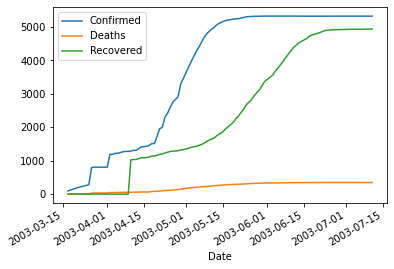

In [222]:
# For sars spread
spread_200_sars.groupby(spread_200_sars.index)['Confirmed','Deaths','Recovered'].max().plot(kind='line')
plt.show()

<ipython-input-223-254a049100be>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  spread_200_covid.groupby(spread_200_covid.index)['Confirmed','Deaths','Recovered'].max().plot(kind='line')


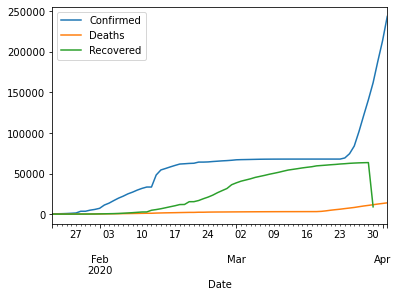

In [223]:
# For covid spread
spread_200_covid.groupby(spread_200_covid.index)['Confirmed','Deaths','Recovered'].max().plot(kind='line')
plt.show()

<ipython-input-224-b83d5fc839c0>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  spread_200_ebola.groupby(spread_200_ebola.index)['Confirmed','Deaths'].max().plot(kind='line')


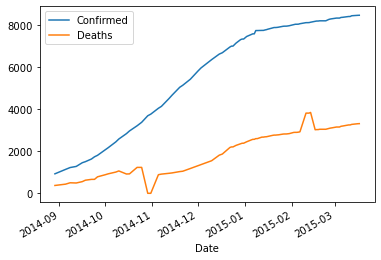

In [224]:
# For covid spread
spread_200_ebola.groupby(spread_200_ebola.index)['Confirmed','Deaths'].max().plot(kind='line')
plt.show()

## Countries and infections repartition

#### For Ebola

In [225]:
data_ebola

,Country/Region,Date,Confirmed,Deaths,Lat,Long
0,Guinea,2014-08-29,482.0,287.0,9.945600,-9.696600
1,Nigeria,2014-08-29,15.0,6.0,9.082000,8.675300
2,Sierra Leone,2014-08-29,935.0,380.0,8.460555,-11.779889
3,Liberia,2014-08-29,322.0,225.0,6.428100,-9.429500
4,Sierra Leone,2014-09-05,1146.0,443.0,8.460555,-11.779889
...,...,...,...,...,...,...
2480,Liberia,2016-03-23,3151.0,NaN,6.428100,-9.429500
2481,Italy,2016-03-23,1.0,NaN,43.000000,12.000000
2482,Liberia,2016-03-23,2.0,1.0,6.428100,-9.429500
2483,Nigeria,2016-03-23,19.0,7.0,9.082000,8.675300


In [226]:
group_countries_ebola = data_ebola.groupby('Country/Region')['Confirmed','Deaths'].max()

<ipython-input-226-3092c355ca85>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_countries_ebola = data_ebola.groupby('Country/Region')['Confirmed','Deaths'].max()


In [227]:
group_countries_ebola

,Confirmed,Deaths
Country/Region,,
Guinea,3351.0,2083.0
Italy,1.0,0.0
Liberia,3153.0,3858.0
Mali,7.0,5.0
Nigeria,19.0,7.0
Senegal,1.0,0.0
Sierra Leone,8704.0,3589.0
Spain,1.0,0.0
US,4.0,1.0


#### Countries affceted for ebola outbreak

In [228]:
len(data_ebola['Country/Region'].unique())

10

In [231]:
group_countries_covid = data_covid.groupby('Country/Region')['Confirmed','Deaths', 'Recovered'].max()

<ipython-input-231-4e0f5b87bebc>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_countries_covid = data_covid.groupby('Country/Region')['Confirmed','Deaths', 'Recovered'].max()


In [232]:
group_countries_covid

,Confirmed,Deaths,Recovered
Country/Region,,,
Afghanistan,273,6,3900.0
Albania,277,16,58946.0
Algeria,986,86,1014.0
Andorra,428,15,3459.0
Angola,8,2,3547.0
...,...,...,...
Venezuela,146,5,424.0
Vietnam,233,0,752.0
West Bank and Gaza,161,1,404.0


#### Countries affceted for ebola outbreak

In [233]:
len(data_covid['Country/Region'].unique())

181

In [235]:
group_countries_sars = data_sars.groupby('Country/Region')['Confirmed','Deaths', 'Recovered'].max()
group_countries_sars

<ipython-input-235-539db7154a68>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_countries_sars = data_sars.groupby('Country/Region')['Confirmed','Deaths', 'Recovered'].max()


,Confirmed,Deaths,Recovered
Country/Region,,,
Australia,6,0,6
Belgium,1,0,0
Brazil,3,0,2
Bulgaria,1,0,0
Canada,252,38,194
China,5329,348,4941
Colombia,1,0,1
Finland,1,0,1
France,7,1,6


#### Countries affceted for sars outbreak

In [236]:
len(data_sars['Country/Region'].unique())

36

###  Most Countries Affect by the outbreak

In [248]:
# In case of ebola
group_countries_ebola.nlargest(10,'Confirmed')

,Confirmed,Deaths
Country/Region,,
Sierra Leone,8704.0,3589.0
Guinea,3351.0,2083.0
Liberia,3153.0,3858.0
Nigeria,19.0,7.0
Mali,7.0,5.0
US,4.0,1.0
Italy,1.0,0.0
Senegal,1.0,0.0
Spain,1.0,0.0


In [247]:
group_countries_ebola.nlargest(10,'Deaths')

,Confirmed,Deaths
Country/Region,,
Liberia,3153.0,3858.0
Sierra Leone,8704.0,3589.0
Guinea,3351.0,2083.0
Nigeria,19.0,7.0
Mali,7.0,5.0
US,4.0,1.0
Italy,1.0,0.0
Senegal,1.0,0.0
Spain,1.0,0.0


In [245]:
# In case of sars
group_countries_sars.nlargest(10,'Confirmed')

,Confirmed,Deaths,Recovered
Country/Region,,,
China,5329,348,4941
Hong Kong,1755,298,1433
Taiwan*,698,84,507
Canada,252,38,194
US,220,0,67
Singapore,206,32,172
Vietnam,63,5,58
Philippines,14,2,12
Germany,10,0,9


In [246]:
# In case of sars
group_countries_sars.nlargest(10,'Deaths')

,Confirmed,Deaths,Recovered
Country/Region,,,
China,5329,348,4941
Hong Kong,1755,298,1433
Taiwan*,698,84,507
Canada,252,38,194
Singapore,206,32,172
Vietnam,63,5,58
Malaysia,8,2,5
Philippines,14,2,12
Thailand,9,2,7


In [253]:
# In case of covid
group_countries_covid.nlargest(10,'Confirmed')

,Confirmed,Deaths,Recovered
Country/Region,,,
US,243453,5926,40592.0
Italy,115242,13915,935.0
Spain,112065,10348,2959.0
Germany,84794,1107,1014.0
China,67802,3199,56003.0
France,59105,5387,51553.0
Iran,50468,3160,62889.0
United Kingdom,33718,2921,60324.0
Switzerland,18827,536,9211.0


In [254]:
# In case of covid
group_countries_covid.nlargest(10,'Deaths')

,Confirmed,Deaths,Recovered
Country/Region,,,
Italy,115242,13915,935.0
Spain,112065,10348,2959.0
US,243453,5926,40592.0
France,59105,5387,51553.0
China,67802,3199,56003.0
Iran,50468,3160,62889.0
United Kingdom,33718,2921,60324.0
Netherlands,14697,1339,46488.0
Germany,84794,1107,1014.0


## Countries confirmed by with small cases

In [255]:
group_countries_sars.nsmallest(10,'Confirmed')

,Confirmed,Deaths,Recovered
Country/Region,,,
Belgium,1,0,0
Bulgaria,1,0,0
Colombia,1,0,1
Finland,1,0,1
Kuwait,1,0,1
New Zealand,1,0,1
Poland,1,0,0
Russia,1,0,0
Slovenia,1,0,0


In [256]:
group_countries_sars.nsmallest(10,'Deaths')

,Confirmed,Deaths,Recovered
Country/Region,,,
Australia,6,0,6
Belgium,1,0,0
Brazil,3,0,2
Bulgaria,1,0,0
Colombia,1,0,1
Finland,1,0,1
Germany,10,0,9
India,3,0,3
Indonesia,2,0,2


In [257]:
group_countries_covid.nsmallest(10,'Confirmed')

,Confirmed,Deaths,Recovered
Country/Region,,,
Papua New Guinea,1,0,15473.0
Timor-Leste,1,0,1221.0
Saint Vincent and the Grenadines,2,0,1014.0
Sierra Leone,2,0,372.0
Belize,3,0,26743.0
Burundi,3,0,917.0
Central African Republic,3,0,631.0
Malawi,3,0,2134.0
Botswana,4,1,36208.0


In [258]:
group_countries_covid.nsmallest(10,'Deaths')

,Confirmed,Deaths,Recovered
Country/Region,,,
Antigua and Barbuda,9,0,10457.0
Barbados,46,0,16780.0
Belize,3,0,26743.0
Benin,13,0,868.0
Bhutan,5,0,310.0
Burundi,3,0,917.0
Cambodia,110,0,8913.0
Central African Republic,3,0,631.0
Chad,8,0,7931.0


In [260]:
group_countries_ebola.nsmallest(10,'Confirmed')

,Confirmed,Deaths
Country/Region,,
Italy,1.0,0.0
Senegal,1.0,0.0
Spain,1.0,0.0
United Kingdom,1.0,0.0
US,4.0,1.0
Mali,7.0,5.0
Nigeria,19.0,7.0
Liberia,3153.0,3858.0
Guinea,3351.0,2083.0


In [259]:
group_countries_ebola.nsmallest(10,'Deaths')

,Confirmed,Deaths
Country/Region,,
Italy,1.0,0.0
Senegal,1.0,0.0
Spain,1.0,0.0
United Kingdom,1.0,0.0
US,4.0,1.0
Mali,7.0,5.0
Nigeria,19.0,7.0
Guinea,3351.0,2083.0
Sierra Leone,8704.0,3589.0


#### Let us  group diseas by  countries  and visualize

In [262]:
# For ebola
data_ebola['Country/Region'].value_counts()

Liberia           365
Sierra Leone      259
Guinea            259
Nigeria           255
Senegal           254
US                245
Spain             243
Mali              243
United Kingdom    221
Italy             141
Name: Country/Region, dtype: int64

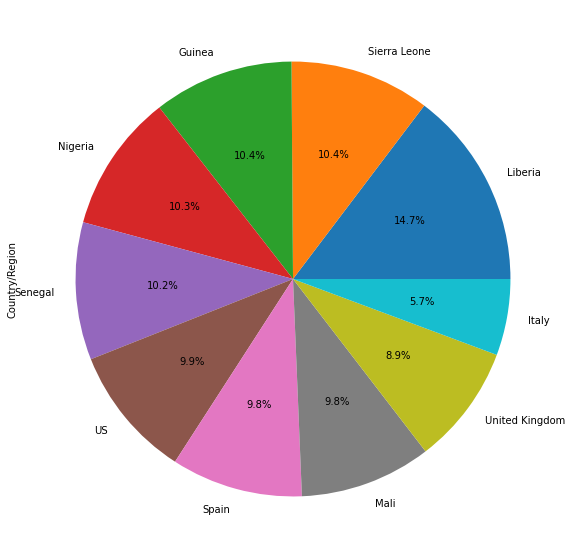

In [269]:
plt.figure(figsize=(10,10))
data_ebola['Country/Region'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

In [263]:
# For sars
data_sars['Country/Region'].value_counts()

China             154
Germany            96
Hong Kong          96
Singapore          96
Canada             96
Thailand           96
Vietnam            95
United Kingdom     95
Taiwan*            95
US                 94
Switzerland        94
Ireland            92
Italy              92
France             90
Romania            87
Spain              86
Brazil             81
Malaysia           79
Kuwait             75
South Africa       74
Sweden             72
Philippines        72
Indonesia          72
Mongolia           69
India              64
Korea, South       59
New Zealand        56
Colombia           53
Finland            51
Russia             31
Bulgaria           20
Japan              19
Australia          17
Poland             10
Belgium             5
Slovenia            5
Name: Country/Region, dtype: int64

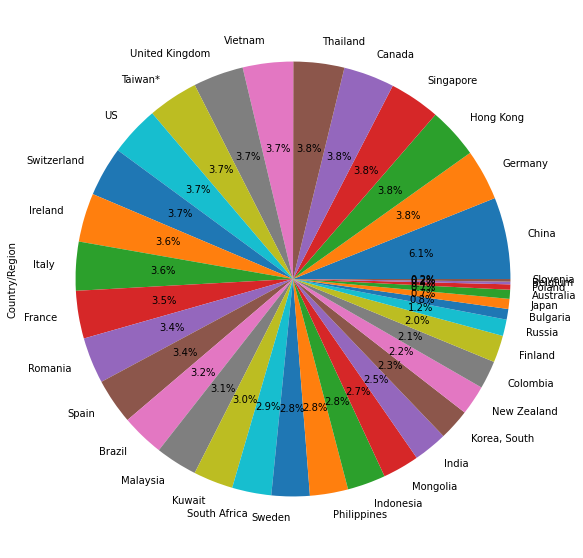

In [270]:
# For sars
plt.figure(figsize=(10,10))
data_sars['Country/Region'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

In [264]:
# for covid
data_covid['Country/Region'].value_counts()

China              2376
Canada             1080
France              720
United Kingdom      720
Australia           576
                   ... 
Austria              72
Botswana             72
North Macedonia      72
Brunei               72
Croatia              72
Name: Country/Region, Length: 181, dtype: int64

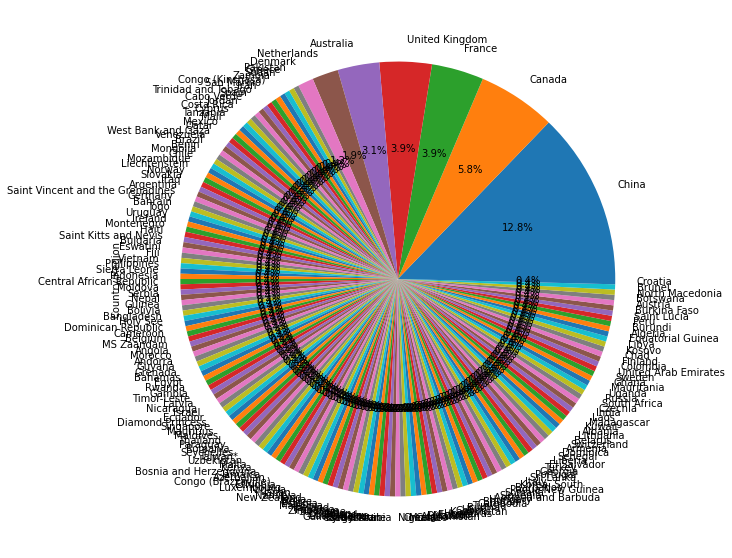

In [271]:
# For sars
plt.figure(figsize=(10,10))
data_covid['Country/Region'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

## Let us visualize the spread of the outbbreaks geography

In [275]:
# We used geopandas here
geogra_spre_ebola = gpd.GeoDataFrame(data_ebola,geometry=gpd.points_from_xy(data_ebola['Long'],data_ebola['Lat']))

In [276]:
geogra_spre_ebola 

,Country/Region,Date,Confirmed,Deaths,Lat,Long,geometry
0,Guinea,2014-08-29,482.0,287.0,9.945600,-9.696600,POINT (-9.69660 9.94560)
1,Nigeria,2014-08-29,15.0,6.0,9.082000,8.675300,POINT (8.67530 9.08200)
2,Sierra Leone,2014-08-29,935.0,380.0,8.460555,-11.779889,POINT (-11.77989 8.46056)
3,Liberia,2014-08-29,322.0,225.0,6.428100,-9.429500,POINT (-9.42950 6.42810)
4,Sierra Leone,2014-09-05,1146.0,443.0,8.460555,-11.779889,POINT (-11.77989 8.46056)
...,...,...,...,...,...,...,...
2480,Liberia,2016-03-23,3151.0,NaN,6.428100,-9.429500,POINT (-9.42950 6.42810)
2481,Italy,2016-03-23,1.0,NaN,43.000000,12.000000,POINT (12.00000 43.00000)
2482,Liberia,2016-03-23,2.0,1.0,6.428100,-9.429500,POINT (-9.42950 6.42810)
2483,Nigeria,2016-03-23,19.0,7.0,9.082000,8.675300,POINT (8.67530 9.08200)


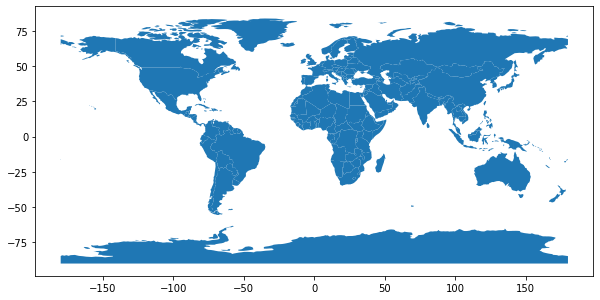

In [281]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
ax = world.plot(figsize=(10,10))

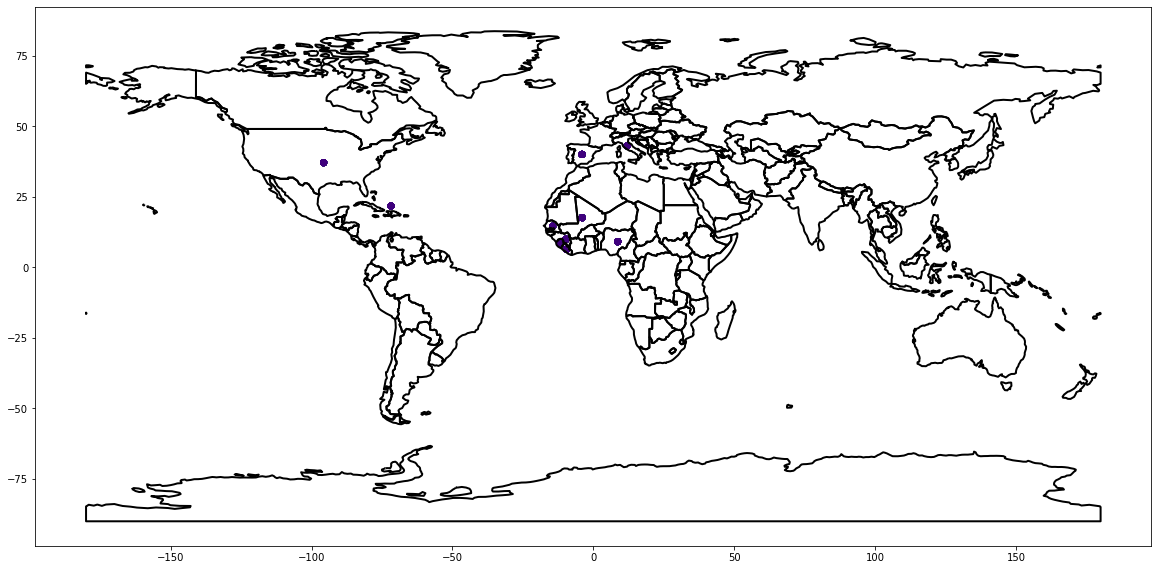

In [286]:
fig,ax = plt.subplots(figsize=(20,10))
geogra_spre_ebola.plot(cmap='Purples',ax=ax)
world.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)
plt.show()

In [279]:
# We used geopandas here
geogra_spre_sars = gpd.GeoDataFrame(data_sars,geometry=gpd.points_from_xy(data_sars['Long'],data_sars['Lat']))
geogra_spre_sars 

,Date,Country/Region,Confirmed,Deaths,Recovered,Lat,Long,geometry
0,2003-03-17,Germany,1,0,0,51.0000,9.0000,POINT (9.00000 51.00000)
1,2003-03-17,Canada,8,2,0,64.2823,-135.0000,POINT (-135.00000 64.28230)
2,2003-03-17,Singapore,20,0,0,1.2833,103.8333,POINT (103.83330 1.28330)
3,2003-03-17,Hong Kong,95,1,0,NaN,NaN,POINT (nan nan)
4,2003-03-17,Switzerland,2,0,0,46.8182,8.2275,POINT (8.22750 46.81820)
...,...,...,...,...,...,...,...,...
2533,2003-07-11,Switzerland,1,0,1,46.8182,8.2275,POINT (8.22750 46.81820)
2534,2003-07-11,Thailand,9,2,7,15.0000,101.0000,POINT (101.00000 15.00000)
2535,2003-07-11,United Kingdom,4,0,4,21.6940,-71.7979,POINT (-71.79790 21.69400)
2536,2003-07-11,US,75,0,67,37.0902,-95.7129,POINT (-95.71290 37.09020)


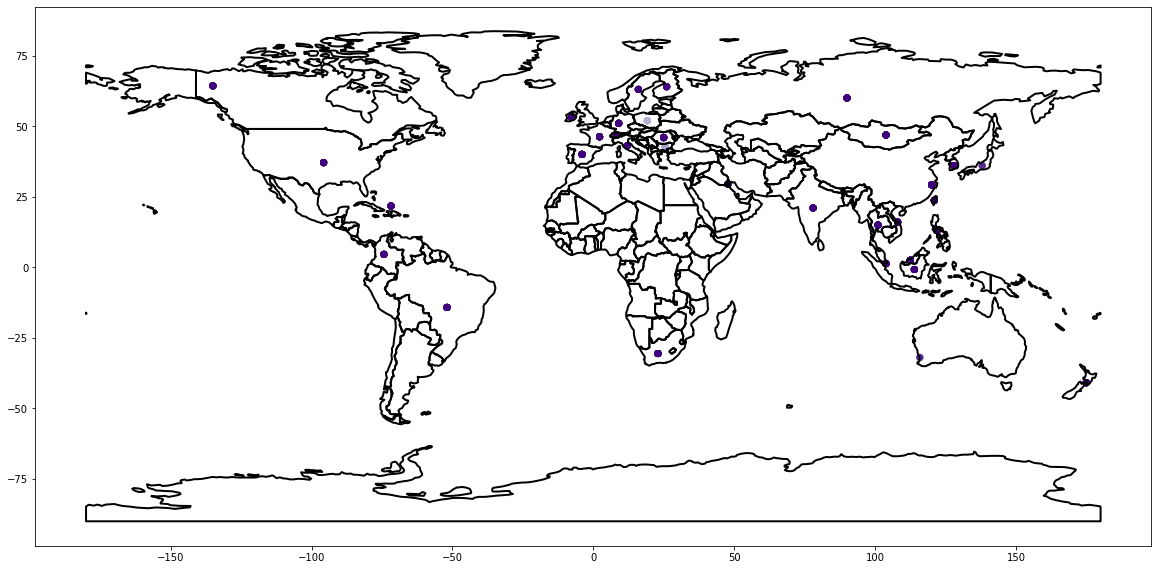

In [287]:
fig,ax = plt.subplots(figsize=(20,10))
geogra_spre_sars.plot(cmap='Purples',ax=ax)
world.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)
plt.show()